<a href="https://colab.research.google.com/github/muskangupta042002/Convolution-Neural-Network/blob/master/Basic_Shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip basicshapes.zip

Archive:  basicshapes.zip
   creating: shapes/circles/
 extracting: shapes/circles/drawing(1).png  
 extracting: shapes/circles/drawing(10).png  
 extracting: shapes/circles/drawing(100).png  
 extracting: shapes/circles/drawing(11).png  
 extracting: shapes/circles/drawing(12).png  
 extracting: shapes/circles/drawing(13).png  
 extracting: shapes/circles/drawing(14).png  
 extracting: shapes/circles/drawing(15).png  
 extracting: shapes/circles/drawing(16).png  
 extracting: shapes/circles/drawing(17).png  
 extracting: shapes/circles/drawing(18).png  
 extracting: shapes/circles/drawing(19).png  
 extracting: shapes/circles/drawing(2).png  
 extracting: shapes/circles/drawing(20).png  
 extracting: shapes/circles/drawing(21).png  
 extracting: shapes/circles/drawing(22).png  
 extracting: shapes/circles/drawing(23).png  
 extracting: shapes/circles/drawing(24).png  
 extracting: shapes/circles/drawing(25).png  
 extracting: shapes/circles/drawing(26).png  
 extracting: shapes/circle

In [2]:
import os
from glob import glob

In [3]:
glob('shapes/triangles/*')[:10]

['shapes/triangles/drawing(45).png',
 'shapes/triangles/drawing(6).png',
 'shapes/triangles/drawing(80).png',
 'shapes/triangles/drawing(82).png',
 'shapes/triangles/drawing(95).png',
 'shapes/triangles/drawing(13).png',
 'shapes/triangles/drawing(43).png',
 'shapes/triangles/drawing(37).png',
 'shapes/triangles/drawing(85).png',
 'shapes/triangles/drawing(77).png']

In [4]:
import imageio
import matplotlib.pyplot as plt

In [5]:
temp = imageio.imread('shapes/triangles/drawing(96).png')

In [6]:
temp.shape

(28, 28, 3)

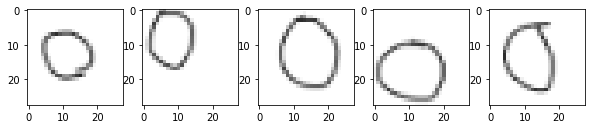

In [7]:
fig = plt.figure(figsize = (10,2))
for i in range(1,6):
    ax = plt.subplot(1,5,i)
    img= imageio.imread(glob('shapes/circles/*')[i])
    plt.imshow(img)



In [8]:
!rm -r /content/shapes/shapes

rm: cannot remove '/content/shapes/shapes': No such file or directory


In [9]:
!mkdir shapes_val
!mkdir shapes_val/circles
!mkdir shapes_val/squares
!mkdir shapes_val/triangles

In [10]:
squares = glob('shapes/squares/*')
circles = glob('shapes/circles/*')
triangles = glob('shapes/triangles/*')

In [11]:
len(triangles)

100

In [12]:
for img in squares[-20:]:
    os.replace(img, img.replace('shapes', 'shapes_val'))
for img in circles[-20:]:
    os.replace(img, img.replace('shapes', 'shapes_val'))
for img in triangles[-20:]:
    os.replace(img, img.replace('shapes', 'shapes_val'))

In [13]:
!pip install --upgrade tensorflow keras

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


In [14]:
import keras

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import EarlyStopping

In [16]:
classifier = Sequential()

# First Convolution Layer
classifier.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

# Second Convolution Layer
classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

# Flattening
classifier.add(Flatten())

# Full Connection (Hidden Layers)
classifier.add(Dense(64, activation='relu'))

# Output Layer
classifier.add(Dense(3, activation='softmax'))

In [17]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        '/content/shapes',
        target_size=(28, 28),
        batch_size=32,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_set = validation_datagen.flow_from_directory(
        '/content/shapes_val',
        target_size=(28, 28),
        batch_size=32,
        class_mode='categorical')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [21]:
train_set.class_indices

{'circles': 0, 'squares': 1, 'triangles': 2}

In [22]:
classifier.fit_generator(
        train_set,
        steps_per_epoch=240,
        epochs=20,
        validation_data=validation_set,
        validation_steps=60)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
  8/240 [>.............................] - 1s 67ms/step - loss: 1.1103 - accuracy: 0.3125 - val_loss: 1.0937 - val_accuracy: 0.4000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from PIL import Image

In [ ]:
circle_png = Image.open('/content/drive/My Drive/datasets/circle.png')
sq = Image.open('/content/drive/My Drive/datasets/squares.png')
tr = Image.open('/content/drive/My Drive/datasets/Triangle.png')

In [ ]:
plt.imshow(tr)

In [ ]:
circle_png = circle_png.convert('RGB')
sq = sq.convert('RGB')
tr = tr.convert('RGB')

In [ ]:
circle_png = circle_png.resize((28,28), Image.ANTIALIAS)
sq = sq.resize((28,28), Image.ANTIALIAS)
tr = tr.resize((28,28), Image.ANTIALIAS)

In [ ]:
plt.imshow(tr)

In [ ]:
import pandas as pd

In [ ]:
classifier.predict(np.array(tr).reshape(1,28,28,3))

In [ ]:
train_set.class_indices

----------------------------------------------

In [ ]:
import numpy as np

In [ ]:
classes = {'circles': 0, 'squares': 1, 'triangles': 2}
classes

In [ ]:
answers = np.array([[0.45, 0.35, 0.2], [0.1, 0.3, 0.6], [0.35, 0.55, 0.1]])

In [ ]:
answers = [np.argmax(ans) for ans in answers]

In [ ]:
answers

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [ ]:
lb.fit(np.array([0,1,2]))

In [ ]:
lb.classes_

In [ ]:
answers = np.array([[0.45, 0.35, 0.2], [0.1, 0.3, 0.6], [0.35, 0.55, 0.1]])

In [ ]:
lb.inverse_transform(answers)